# Implement Differential Privacy on Financial Data

There are several libraries and packages that provide tools for implementing differential privacy in various languages. We will focus on Python.


## General Differential Privacy

- **PySyft:** Library for encrypted, privacy-preserving machine learning.
- **PySyft Grid:** A peer-to-peer network of PySyft nodes.
- **Diffprivlib:** A library for differentially private machine learning.



In [ ]:
# Install IBM package
!pip install diffprivlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 3.5 MB/s eta 0:00:00


# Why create synthetic data?

Creating synthetic datasets for financial crime when real datasets are unavailable due to privacy concerns and regulations can be a viable solution. However, it’s crucial to note that the effectiveness of synthetic datasets depends on the quality of the generation process. The synthetic data should accurately capture statistical properties and patterns present in real financial data to ensure that models trained on such data are relevant and reliable in real-world applications.

Faker Documentation: https://faker.readthedocs.io/en/master/

In [ ]:
#First install the faker package
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from faker import Faker
from datetime import datetime, timedelta

def generate_synthetic_data():
    # Set seeds for reproducibility
    np.random.seed(42)
    fake = Faker()
    Faker.seed(42)

    # Number of rows in the dataset
    n_rows = 10000

    # Generate synthetic data
    data = {
        'Cardholder_Name': [fake.name() for _ in range(n_rows)],
        'Customer_ID': np.arange(1, n_rows + 1),
        'Age': np.random.randint(18, 100, n_rows),
        'Transaction_Date': [fake.date_between(start_date='-365d', end_date='today') for _ in range(n_rows)],
        'Transaction_Amount_AUD': np.random.uniform(1, 5000, n_rows),
        'Merchant_Name': [fake.company() for _ in range(n_rows)],
        'Credit_Score': np.random.randint(300, 850, n_rows),
        'Annual_Income': np.random.uniform(50000, 320000, n_rows),
        'Years_In_Current_Job': np.random.choice(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'], n_rows),
        'Home_Ownership': np.random.choice(['Rent', 'Own', 'Mortgage'], n_rows),
        'Monthly_Debt': np.random.uniform(100, 3000, n_rows),
        'Years_of_Credit_History': np.random.uniform(1, 30, n_rows),
        'Months_Since_Last_Delinquent': np.random.randint(0, 60, n_rows),
        'Number_of_Credit_Problems': np.random.randint(0, 5, n_rows),
        'Bankruptcies': np.random.randint(0, 2, n_rows),
        'IsFraud': np.random.choice([0, 1], n_rows, p=[0.98, 0.02]),
    }



    # Create a DataFrame from the generated data
    df = pd.DataFrame(data)
    return df


In [ ]:
# Lets generate our own dataset
our_own_data = generate_synthetic_data()
our_own_data.head()

,Cardholder_Name,Customer_ID,Age,Transaction_Date,Transaction_Amount_AUD,Merchant_Name,Credit_Score,Annual_Income,Years_In_Current_Job,Home_Ownership,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Credit_Problems,Bankruptcies,IsFraud
0,Allison Hill,1,69,2023-11-25,3595.395079,Curtis-Walters,336,56277.617527,5 years,Own,721.008216,9.664825,39,3,0,0
1,Noah Rhodes,2,32,2023-07-05,2519.940095,Bennett-Cook,692,283266.964415,5 years,Mortgage,1792.166697,12.010090,10,0,1,0
2,Angie Henderson,3,89,2023-04-26,3544.119396,"Campos, Durham and Stewart",590,56724.368831,4 years,Rent,2314.277177,18.059815,42,0,1,0
3,Daniel Wagner,4,78,2022-12-20,1245.468680,Parks Group,602,136047.876222,4 years,Own,124.018741,27.969520,51,1,0,0
4,Cristian Santos,5,38,2023-02-08,1622.866705,"Evans, Taylor and Flores",700,71126.553095,10+ years,Rent,2486.156513,3.828747,34,1,1,0


# Differential Privacy

The PyDP package provides a Python API into Google's Differential Privacy library. The work below is based on the tutorial https://github.com/OpenMined/PyDP/blob/dev/examples/Tutorial_3-Titanic_demo/titanic_notebook.ipynb

We will implement simple differential privacy on our own created synthetic dataset. Differential privacy is a concept in data privacy that aims to protect the privacy of individuals while allowing for meaningful analysis of data. The basic idea is to add noise to the data in a way that guarantees that the presence or absence of any single individual's data does not significantly affect the outcome of the analysis.

In [ ]:
# Install the PyDP package
! pip install python-dp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 5.1 MB/s eta 0:00:00


In [ ]:
import pydp as dp  # by convention our package is to be imported as dp (for Differential Privacy!)
from pydp.algorithms.laplacian import (
    BoundedSum,
    BoundedMean,
    BoundedStandardDeviation,
    Count,
    Max,
    Min,
    Median,
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  # for calculating mean without applying differential privacy


**What is the average annual income amount**

In [ ]:
# Calculates transaction mean without applying differential privacy
def mean_income() -> float:
    return statistics.mean(list(our_own_data['Annual_Income']))

In [ ]:
# Calculates transaction mean applying differential privacy
def private_mean(privacy_budget: float) -> float:
    x = BoundedMean(privacy_budget, lower_bound=0.1, upper_bound=200000, dtype="float")
    return x.quick_result(list(our_own_data['Annual_Income']))

In [ ]:
print("Mean: ", mean_income())
print("Private Mean: ", private_mean(0.8))

Mean:  184681.6001515841
Private Mean:  158244.1304992842


**What is the age of the youngest customer**

In [ ]:
# Function to return the minimum of the customers age without appyling differential privacy.
def min_age() -> int:
    return our_own_data.min()[2]

In [ ]:
# Function to return the minimum of the customers age appyling differential privacy.
def private_min(privacy_budget: float) -> float:
    # 0 and 150 are the upper and lower limits for the search bound.
    x = Min(privacy_budget, lower_bound=0.1, upper_bound=90, dtype="float")
    return x.quick_result(list(our_own_data["Age"]))

In [ ]:
print("Min:\t" + str(min_age()))
print("Private Min:\t" + str(private_min(1)))

Min:	18
Private Min:	17.99974782386804


### How many customers are younger than a certain age?

In [ ]:
# Calculates number of customers whose age is less than "limit" age without applying differential privacy.
def count_below(limit: int) -> int:
    return our_own_data[our_own_data.Age < limit].shape[0]

# Calculates number of customers whose age is less than "limit" age applying differential privacy.
def private_count_below(privacy_budget: float, limit: int) -> int:
    x = Count(privacy_budget, dtype="float")
    # Reset the index before applying boolean indexing
    return x.quick_result(list(our_own_data[our_own_data.Age < limit].reset_index(drop=True)["Age"]))

# Example usage:
print("Below 21:\t" + str(count_below(50)))
print("Private count below:\t" + str(private_count_below(1, 50)))


Below 21:	3917
Private count below:	3918


# Implementing Differential Privacy on Logistic Regression for Fraud Detection

We will utilise logistic regression on a synthetic dataset to predict a binary outcome, likely associated with fraud detection. Logistic regression is applied conventionally without privacy measures, and another where we integrate the IBM diffprivlib Python library into logistic regression process. The former involves training the model on the original data, while the latter incorporates privacy safeguards using the IBM diffprivlib library, mitigating the risk of revealing individual-level information. There is a trade-off between model accuracy and individual privacy protection.

In [ ]:
#import important libraries
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

<Axes: xlabel='IsFraud', ylabel='count'>

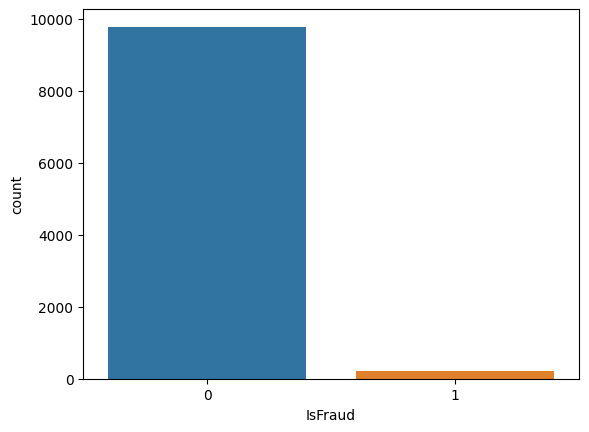

In [ ]:
#visualize the target class 'IsFraud'
sns.countplot(x='IsFraud', data=our_own_data)

In [ ]:
#seperating positive and negative classes
positiveDataset = our_own_data.loc[our_own_data['IsFraud'] == 1]
negativeDataset = our_own_data.loc[our_own_data['IsFraud'] == 0]

In [ ]:
#creating training and testing set with negative class split 1:1 and positive class split 4:1, also keeping random_state constant so that all splits are same
positiveTrain, positiveTest = tts(positiveDataset, test_size=0.2, random_state=21)
negativeTrain, negativeTest = tts(negativeDataset, test_size=0.5)
trainDataset = positiveTrain.append(negativeTrain)
testDataset = positiveTest.append(negativeTest)

<ipython-input-28-6b631cdaf369>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainDataset = positiveTrain.append(negativeTrain)
<ipython-input-28-6b631cdaf369>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testDataset = positiveTest.append(negativeTest)


In [ ]:
our_own_data.columns

Index(['Cardholder_Name', 'Customer_ID', 'Age', 'Transaction_Date',
       'Transaction_Amount_AUD', 'Merchant_Name', 'Credit_Score',
       'Annual_Income', 'Years_In_Current_Job', 'Home_Ownership',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_Since_Last_Delinquent', 'Number_of_Credit_Problems',
       'Bankruptcies', 'IsFraud'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'our_own_data' is your DataFrame
# Replace 'features_column_names' and 'target_column_name' with the actual column names in your dataset

features_column_names = ['Annual_Income', 'Transaction_Amount_AUD', 'Credit_Score']  # Replace with your actual feature column names
target_column_name = 'IsFraud'    # Replace with your actual target column name

X = our_own_data[features_column_names]
y = our_own_data[target_column_name]

# Split the dataset into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with Differential Privacy

In [ ]:
#We will fit the training dataset using logistic Regression
clf = LogisticRegression(solver="lbfgs")
clf.fit(xTrain, yTrain)


LogisticRegression()

In [ ]:
baseline = clf.score(xTest, yTest)
print("Non-private test accuracy: %.2f%%" % (baseline * 100))

Non-private test accuracy: 97.70%


In [ ]:
import diffprivlib.models as dp
dp_clf = dp.LogisticRegression(random_state=0)
dp_clf.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
                   data_norm=320014.2308676398, random_state=0)

In [ ]:
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
     (dp_clf.epsilon, dp_clf.score(xTest, yTest) * 100))

Differentially private test accuracy (epsilon=1.00): 96.50%


In [ ]:
from diffprivlib.utils import check_random_state

accuracy = []
epsilons = np.logspace(-3, 1, 500)
random_state = check_random_state(42)

for eps in epsilons:
    dp_clf = dp.LogisticRegression(epsilon=eps, data_norm=100, random_state=random_state)
    dp_clf.fit(xTrain, yTrain)
    accuracy.append(dp_clf.score(xTest, yTest))

In [ ]:
import pickle

pickle.dump((epsilons, baseline, accuracy), open("lr_accuracy_500.p", "wb" ) )

In [ ]:
import matplotlib.pyplot as plt
import pickle

epsilons, baseline, accuracy = pickle.load(open("lr_accuracy_500.p", "rb"))

plt.semilogx(epsilons, accuracy, label="Differentially private")
plt.plot(epsilons, np.ones_like(epsilons) * baseline, dashes=[2,2], label="Non-private")
plt.title("Differentially private logistic regression accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(loc=3)
plt.show()

# Implementing MPC and Homomorphic Encryption (HE) using Paillier Cryptosystem Python on Our Own Synthethic dataset

Implementing Multi-Party Computation (MPC) with Python using a synthetic dataset involves creating a protocol that allows different parties to collectively compute a function over their inputs while keeping those inputs private. Here, I'll provide a simplified example using the phe library. In this simple example we will reduce the number of rows to only six because it computationally intensive.

In [ ]:
#The synthetic dataset with 6 rows.
data = our_own_data.head(6)
data

,Cardholder_Name,Customer_ID,Age,Transaction_Date,Transaction_Amount_AUD,Merchant_Name,Credit_Score,Annual_Income,Years_In_Current_Job,Home_Ownership,Monthly_Debt,Years_of_Credit_History,Months_Since_Last_Delinquent,Number_of_Credit_Problems,Bankruptcies,IsFraud
0,Allison Hill,1,69,2023-11-25,3595.395079,Curtis-Walters,336,56277.617527,5 years,Own,721.008216,9.664825,39,3,0,0
1,Noah Rhodes,2,32,2023-07-05,2519.940095,Bennett-Cook,692,283266.964415,5 years,Mortgage,1792.166697,12.010090,10,0,1,0
2,Angie Henderson,3,89,2023-04-26,3544.119396,"Campos, Durham and Stewart",590,56724.368831,4 years,Rent,2314.277177,18.059815,42,0,1,0
3,Daniel Wagner,4,78,2022-12-20,1245.468680,Parks Group,602,136047.876222,4 years,Own,124.018741,27.969520,51,1,0,0
4,Cristian Santos,5,38,2023-02-08,1622.866705,"Evans, Taylor and Flores",700,71126.553095,10+ years,Rent,2486.156513,3.828747,34,1,1,0
5,Connie Lawrence,6,92,2023-02-12,1671.742471,"Rice, Mendez and Leonard",643,260979.600066,7 years,Rent,1447.911956,27.664844,10,4,1,0


In [ ]:
#install package
!pip install phe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
#import library
from phe import paillier


#Each Assumed Party private input
ages_party1 = data['Age'].iloc[:len(data) // 3]
ages_party2 = data['Age'].iloc[len(data) // 3: 2 * len(data) // 3]
ages_party3 = data['Age'].iloc[2 * len(data) // 3:]

# Generate public and private keys
public_key, private_key = paillier.generate_paillier_keypair()

# Encrypt the inputs
encrypted_ages_party1 = [public_key.encrypt(age) for age in ages_party1]
encrypted_ages_party2 = [public_key.encrypt(age) for age in ages_party2]
encrypted_ages_party3 = [public_key.encrypt(age) for age in ages_party3]

# Sum of encrypted inputs
encrypted_sum = sum(encrypted_ages_party1) + sum(encrypted_ages_party2) + sum(encrypted_ages_party3)

# Decrypt the result
decrypted_sum = private_key.decrypt(encrypted_sum)

# Compute the average age
average_age = decrypted_sum / len(data['Age'])

print(f"The average age of customer is: {average_age}")


The average age of customer is: 66.33333333333333


In [ ]:
#Each Assumed Party private input
print(f"Party 1 input is: {ages_party1}")
print(f"Party 2 input is: {ages_party2}")
print(f"Party 3 input is: {ages_party3}")

Party 1 input is: 0    69
1    32
Name: Age, dtype: int64
Party 2 input is: 2    89
3    78
Name: Age, dtype: int64
Party 3 input is: 4    38
5    92
Name: Age, dtype: int64
